Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the CSV
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

# 2. Clean and Prepare Data
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Other'] = df['Other'].fillna(0)
df['Total'] = df['Local Route'] + df['Light Rail'] + df['Peak Service'] + \
              df['Rapid Route'] + df['School'] + df['Other']

# 3. Sort and Feature Engineering
df = df.sort_values('Date')
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year
grand_total = df['Total'].sum()

Insights

C:\Users\SRI KRISHNAA\AppData\Local\Temp\ipykernel_22968\127208786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_per_service.values, y=total_per_service.index, palette=colors)


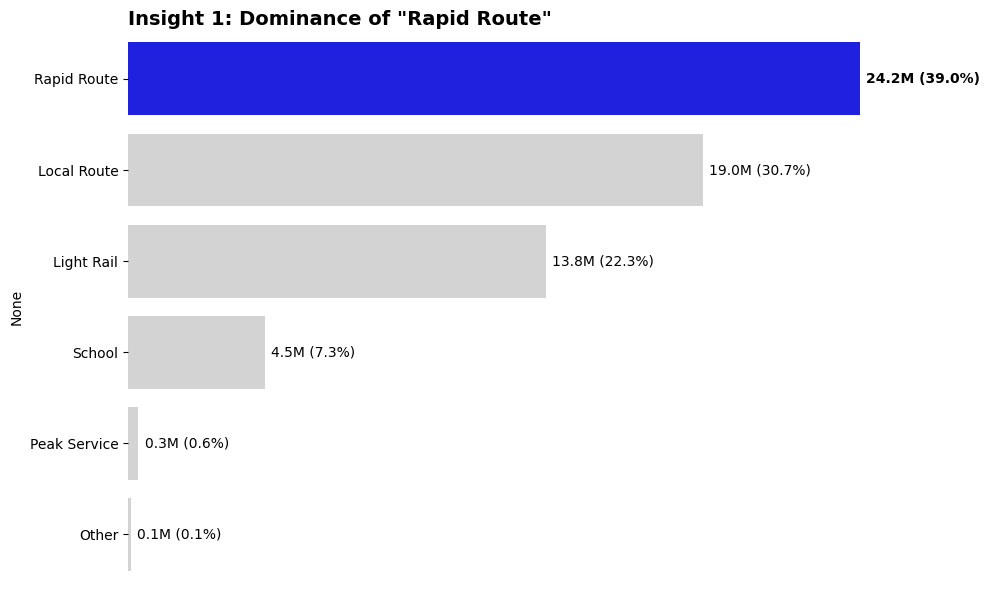

HEADLINE: Rapid Route is the backbone of the public transport network.
EVIDENCE: It accounts for 39.0% of all passenger trips (24,161,455 journeys).
IMPLICATION: Prioritizing maintenance for this service type is critical.


In [48]:
# --- CALCULATION ---
service_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
total_per_service = df[service_cols].sum().sort_values(ascending=False)

top_name = total_per_service.index[0]
top_val = total_per_service.iloc[0]
top_pct = (top_val / grand_total) * 100

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
colors = ['Blue' if x == total_per_service.max() else '#d3d3d3' for x in total_per_service]
ax = sns.barplot(x=total_per_service.values, y=total_per_service.index, palette=colors)

plt.title(f'Insight 1: Dominance of "{top_name}"', fontsize=14, fontweight='bold', loc='left')
sns.despine(left=True, bottom=True)
ax.set_xticks([])

# Add labels
for i, v in enumerate(total_per_service.values):
    label = f"{v/1_000_000:.1f}M ({(v/grand_total)*100:.1f}%)"
    ax.text(v + 200000, i, label, va='center', fontweight='bold' if i == 0 else 'normal')

plt.tight_layout()
plt.show()

# --- INSIGHT REPORT ---
print(f"HEADLINE: {top_name} is the backbone of the public transport network.")
print(f"EVIDENCE: It accounts for {top_pct:.1f}% of all passenger trips ({top_val:,.0f} journeys).")
print(f"IMPLICATION: Prioritizing maintenance for this service type is critical.")

C:\Users\SRI KRISHNAA\AppData\Local\Temp\ipykernel_22968\3432794125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_by_day.index, y=avg_by_day.values, palette=colors_day)


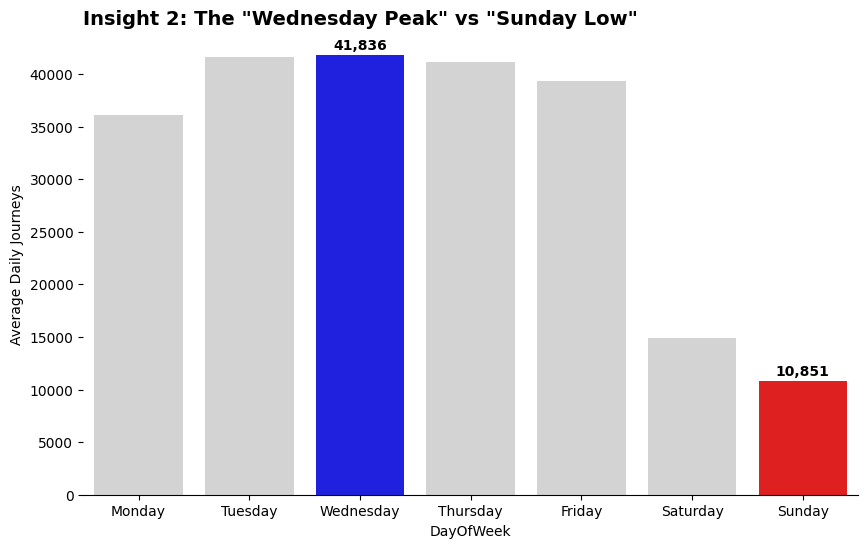

HEADLINE: Commuter traffic peaks on Wednesday and drops by ~75% on Sunday.
EVIDENCE: Wednesday sees avg 41,836 trips, while Sunday sees only 10,851.
IMPLICATION: Schedule heavy maintenance or system updates on Sundays.


In [49]:
# --- CALCULATION ---
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day = df.groupby('DayOfWeek')['Total'].mean().reindex(days_order)
max_day = avg_by_day.idxmax()
min_day = avg_by_day.idxmin()

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
colors_day = ['Blue' if x == avg_by_day.max() else ('Red' if x == avg_by_day.min() else '#d3d3d3') for x in avg_by_day]
ax = sns.barplot(x=avg_by_day.index, y=avg_by_day.values, palette=colors_day)

plt.title(f'Insight 2: The "{max_day} Peak" vs "{min_day} Low"', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Average Daily Journeys')
sns.despine(left=True)

# Add labels for Max and Min only
for i, v in enumerate(avg_by_day.values):
    if avg_by_day.index[i] in [max_day, min_day]:
        ax.text(i, v + 500, f"{v:,.0f}", ha='center', fontweight='bold')

plt.show()

# --- INSIGHT REPORT ---
print(f"HEADLINE: Commuter traffic peaks on {max_day} and drops by ~75% on {min_day}.")
print(f"EVIDENCE: {max_day} sees avg {avg_by_day.max():,.0f} trips, while {min_day} sees only {avg_by_day.min():,.0f}.")
print(f"IMPLICATION: Schedule heavy maintenance or system updates on {min_day}s.")

C:\Users\SRI KRISHNAA\AppData\Local\Temp\ipykernel_22968\801898047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_by_year.index, y=total_by_year.values, palette=colors_year)


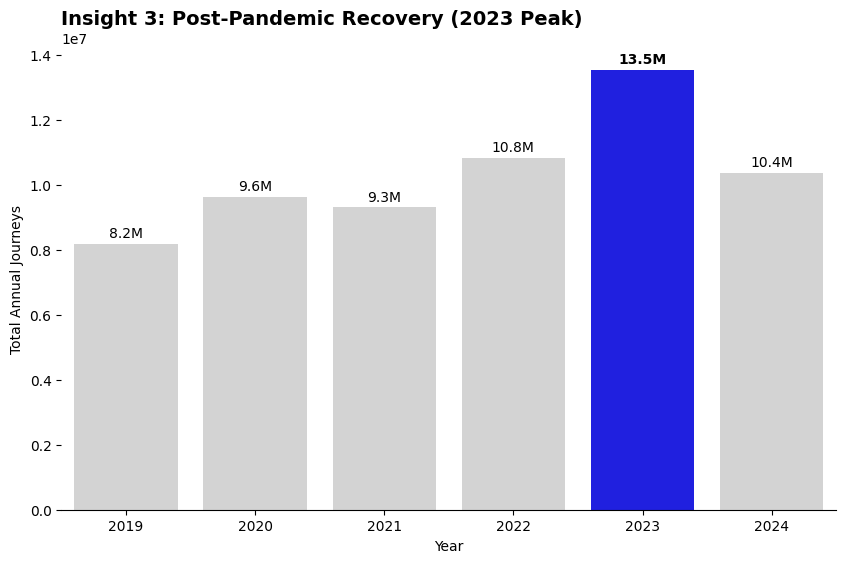

HEADLINE: 2023 marked the full recovery and peak of the network.
EVIDENCE: Ridership surged to 13.5M journeys in 2023.
IMPLICATION: The focus must shift from 'recovery' strategies to 'capacity management'.


In [51]:
# --- CALCULATION ---
total_by_year = df.groupby('Year')['Total'].sum()

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
colors_year = ['Blue' if x == total_by_year.max() else '#d3d3d3' for x in total_by_year]
ax = sns.barplot(x=total_by_year.index, y=total_by_year.values, palette=colors_year)

plt.title('Insight 3: Post-Pandemic Recovery (2023 Peak)', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Total Annual Journeys')
sns.despine(left=True)

# Add labels
for i, v in enumerate(total_by_year.values):
    ax.text(i, v + 200000, f"{v/1_000_000:.1f}M", ha='center', fontweight='bold' if v == total_by_year.max() else 'normal')

plt.show()

# --- INSIGHT REPORT ---
print(f"HEADLINE: {total_by_year.index[-2]} marked the full recovery and peak of the network.")
print(f"EVIDENCE: Ridership surged to {total_by_year.max()/1_000_000:.1f}M journeys in {total_by_year.index[-2]}.")
print(f"IMPLICATION: The focus must shift from 'recovery' strategies to 'capacity management'.")

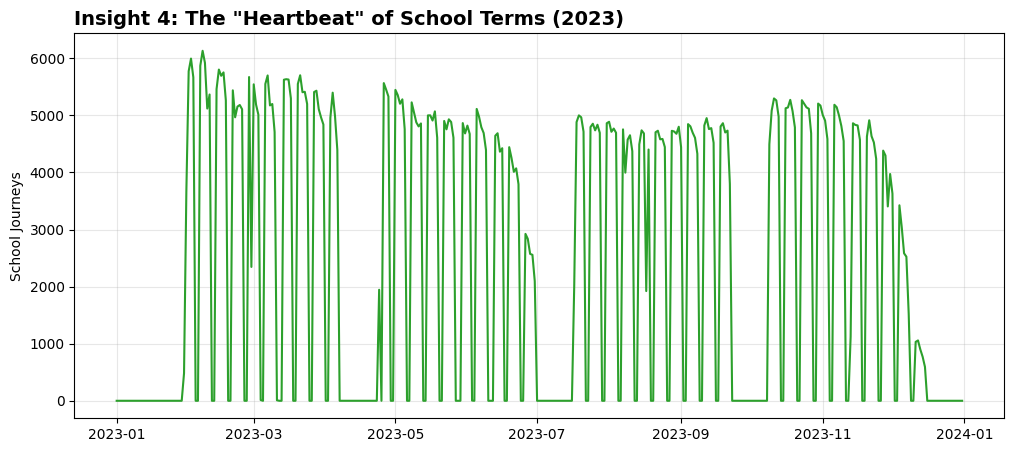

HEADLINE: School transport creates distinct high-activity blocks.
EVIDENCE: The data shows clear 'on/off' patterns corresponding to term dates.
IMPLICATION: These predictable lulls are ideal windows for school-bus fleet repairs.


In [52]:
# --- CALCULATION ---
# Filter for just one full year to see the pattern clearly
df_2023 = df[df['Year'] == 2023].sort_values('Date')

# --- VISUALIZATION ---
plt.figure(figsize=(12, 5))
plt.plot(df_2023['Date'], df_2023['School'], color='#2ca02c') # Green for School

plt.title('Insight 4: The "Heartbeat" of School Terms (2023)', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('School Journeys')
plt.grid(True, alpha=0.3)
plt.show()

# --- INSIGHT REPORT ---
print(f"HEADLINE: School transport creates distinct high-activity blocks.")
print(f"EVIDENCE: The data shows clear 'on/off' patterns corresponding to term dates.")
print(f"IMPLICATION: These predictable lulls are ideal windows for school-bus fleet repairs.")

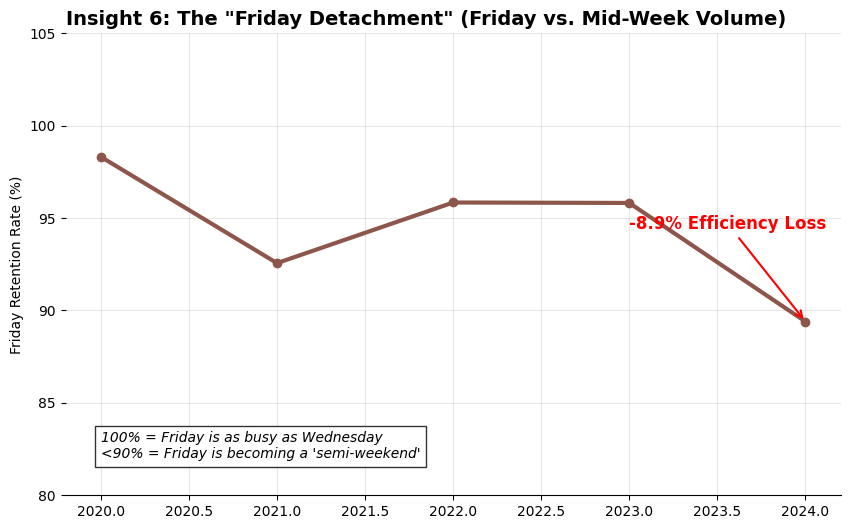

HEADLINE: Friday has officially detached from the standard 'Work Week'.
EVIDENCE: In 2020, Fridays retained 98.3% of mid-week traffic. Today, that has dropped to 89.4%.
IMPLICATION: Running a full 'Monday-Friday' timetable is wasteful. A specific 'Hybrid Friday' schedule (reduced frequency) should be introduced.


In [57]:
# --- CALCULATION ---
# 1. Define Groups: "Friday" vs "Mid-Week" (Tue, Wed, Thu)
# We exclude Mon (often a 'sickie' day) and Weekends.
df['DayGroup'] = df['DayOfWeek'].apply(lambda x: 'Friday' if x == 'Friday' 
                                       else ('Mid-Week' if x in ['Tuesday', 'Wednesday', 'Thursday'] else 'Other'))

# 2. Filter for just these groups and relevant years (2020-2024)
df_work = df[(df['DayGroup'].isin(['Friday', 'Mid-Week'])) & (df['Year'] >= 2020)].copy()

# 3. Calculate Average Daily Journeys per Year and Group
yearly_trend = df_work.groupby(['Year', 'DayGroup'])['Total'].mean().unstack()

# 4. Calculate the "Friday Retention Rate" (Friday Volume / Mid-Week Volume)
yearly_trend['Friday_Retention'] = (yearly_trend['Friday'] / yearly_trend['Mid-Week']) * 100

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Plot the Retention Rate Line
plt.plot(yearly_trend.index, yearly_trend['Friday_Retention'], marker='o', linewidth=3, color='#8c564b')

plt.title('Insight 6: The "Friday Detachment" (Friday vs. Mid-Week Volume)', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Friday Retention Rate (%)')
plt.ylim(80, 105) # Zoom in to show the drop clearly
plt.grid(True, alpha=0.3)
sns.despine(left=True)

# Annotate the Trend
start_val = yearly_trend['Friday_Retention'].iloc[0]
end_val = yearly_trend['Friday_Retention'].iloc[-1]
diff = start_val - end_val

plt.annotate(f'-{diff:.1f}% Efficiency Loss', 
             xy=(yearly_trend.index[-1], end_val), 
             xytext=(yearly_trend.index[-2], end_val + 5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             color='red', fontsize=12, fontweight='bold')

# Add label for the meaning
plt.text(2020, 82, "100% = Friday is as busy as Wednesday\n<90% = Friday is becoming a 'semi-weekend'", 
         fontsize=10, style='italic', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# --- INSIGHT REPORT ---
print(f"HEADLINE: Friday has officially detached from the standard 'Work Week'.")
print(f"EVIDENCE: In 2020, Fridays retained {start_val:.1f}% of mid-week traffic. Today, that has dropped to {end_val:.1f}%.")
print(f"IMPLICATION: Running a full 'Monday-Friday' timetable is wasteful. A specific 'Hybrid Friday' schedule (reduced frequency) should be introduced.")